In [4]:
import random
import matplotlib.pyplot as plt
import math

x = 0.1

n = 10000

# Maps  -1  => 0
#       0   => 0.5
#       1   => 1
def stocFmt(x):
    return x / 2 + 0.5

# Maps  0   => -1
#       0.5 => 0
#       1   => 1
def stocUnfmt(x):
    return (x - 0.5) * 2

def toStochastic(x):
    s = 0
    for i in range(n):
        if random.random() < stocFmt(x):
            s = s << 1 | 1
        else:
            s = s << 1
    return s

def fromStochastic(s):
    x = 0
    for i in range(n):
        x += s & 1
        s >>= 1
    return stocUnfmt(x / n)



In [5]:
def tanhStochastic(*ss):
    s = list(ss)
    x = 0
    out = ""
    S = 0
    for i in range(n):
        for j in range(len(s)):
            b = s[j] & 1
            s[j] >>= 1
            if b == 0:
                S -= 1
            else:
                S += 1
        if S >= 0:
            x += 1
            out = "1" + out
        else:
            out = "0" + out
        if S >= len(s):
            S = len(s)
        if S <= -len(s):
            S = -len(s)
    return stocUnfmt(x / n)


# offsets = [0.1*(random.random() * 2 - 1) for i in range(100)]
offsets = [-0.1, 0.2, 0.3, 0.4, 0.5, -0.6]
print(offsets)
print(sum(offsets))
stocOffsets = [toStochastic(a) for a in offsets]
x = [0.01 * i for i in range(-100, 100)]
y1 = [tanhStochastic(toStochastic(i), *stocOffsets) for i in x]
print(tanhStochastic(*stocOffsets))
print(math.tanh(sum(offsets)))

print("Done")


[-0.1, 0.2, 0.3, 0.4, 0.5, -0.6]
0.7000000000000001
0.8116000000000001
0.6043677771171636
Done


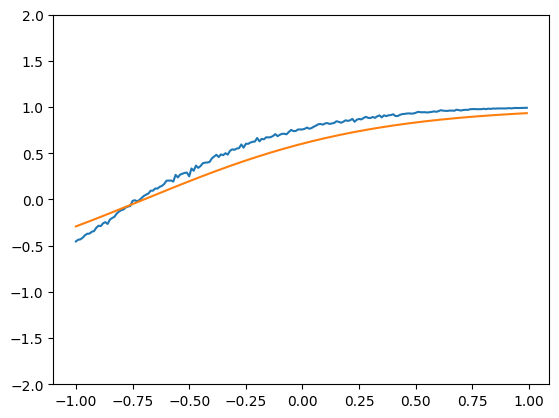

In [6]:
y2 = [math.tanh( 1 * (i + sum(offsets))) for i in x]
plt.plot(x,y1)
plt.plot(x,y2)
plt.ylim([-2,2])
plt.show()

# Plan

## Create Python Simulation
- Simulate input data bits
- Simulate stochastic weighted summation
- Simulate stochastic activation function

## Train Neural Network
- Allow usage of tanh activation
- Train on MNIST
- Output weights
- Test on simulation

## Create Minecraft Neuron
- Neuron
- Dense layer

## Implement Into Anvil
- Template
- Connectivity
- Auto scaling